<a id="cuarto"></a>
## 4. Transfer Learning
En esta sección se trabajará con el dataset trabajado anteriormente, CIFAR [3], pero en su versión mas fina en el cual se presentan 100 tipos distintos de categorías a clasificar la imagen, no 10 como se usó en las actividades anteriores. La estructura es la misma, son 60000 imágenes RGB de 32 $\times$ 32 píxeles separados en 50 mil de entrenamiento y 10 mil de pruebas.  
Aquí se experimentará con el concepto de *transfer learning* el cual consta en transferir conocimiento de un dominio fuente (*source domain*) a un dominio objetivo (*target domain*). En redes neuronales existen muchas representaciones de esto, en común consta en pre inicializar los pesos de la red de alguna manera que no sea con distribuciones de manera aleatoria. También está lo que es utilizar una representación generada a través de otra red entrenada con muchos datos, esto es tomar la red y "*congelar*" sus primeras capas para tomar esta representación y no entrenar esos pesos.  

Para cargar los datos utilice el siguiente comando:

```python
from keras.datasets import cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
```

Normalice y transforme las etiquetas en *one hot* vector.

```python
y_train = keras.utils.to_categorical(y_train, num_classes=100)
y_test = keras.utils.to_categorical(y_test, num_classes=100)
x_train = x_train/255.0
x_test = x_test/255.0
```

> a) Entrene una red neuronal convolucional como se presenta en el código a continuación durante 15 *epochs*, realizando un gráfico de evolución de la función de pérdida y de la exactitud del algoritmo (*accuracy*) sobre ambos conjuntos, entrenamiento y pruebas. Comente sobre el tiempo de ejecución de este entrenamiento. Reporte el *accuracy* del modelo final sobre el conjunto de pruebas.

```python
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:],activation='relu'))
model.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
...#add clasification layer
model.summary()
```

<div class="alert alert-block alert-info"> Se utiliza una tasa de aprendizaje pequeña ya que es lo recomendable en *transfer learning*.</div>

```python
#train it
optimizer_ = SGD(lr=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128,epochs=15,verbose=1, validation_data=(x_test,y_test))
```









In [2]:
from keras.datasets import cifar100
import keras
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

y_train = keras.utils.to_categorical(y_train, num_classes=100)
y_test = keras.utils.to_categorical(y_test, num_classes=100)
x_train = x_train/255.0
x_test = x_test/255.0

En ejercicios anteriores se ha trabajado con Cifar10, un conjunto parecido que tiene solo 10 posibles clases, en este caso el dataset tiene 100 clasificaciones diferentes para las imagenes, esto eleva bastante la complejidad de las redes que se necesitan para lograr un desempeño similar al que se tuvo en Cifar10, por lo que no se espera ver grandes niveles de Accuracy durante el ejercicio.

In [4]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Activation
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:],activation='relu'))
model.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
__________

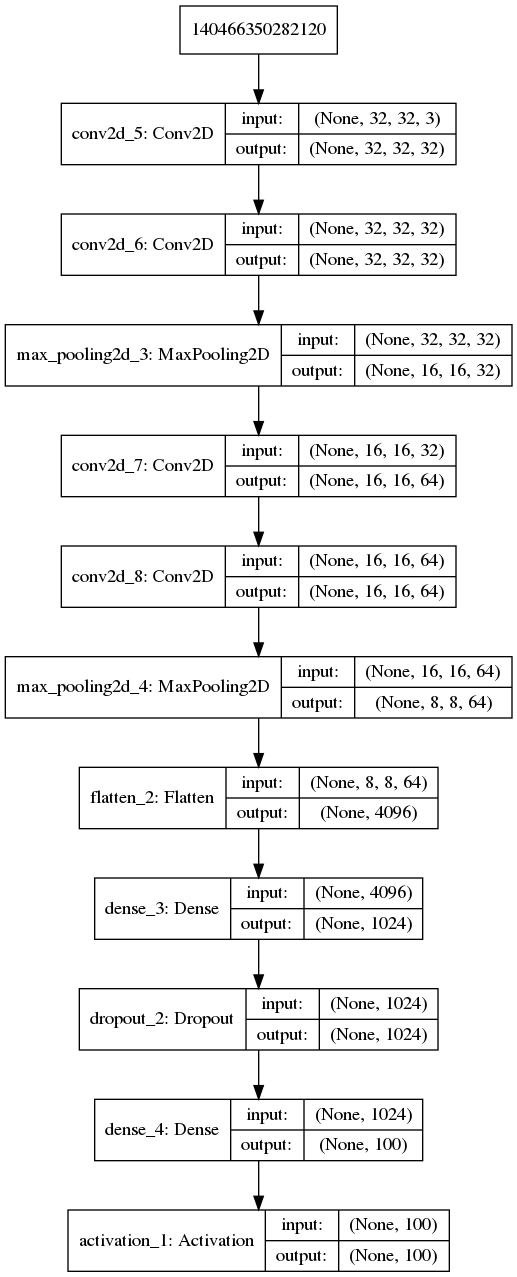

In [6]:
import os    
import keras
import matplotlib.pyplot as plt
from IPython.display import Image, display, SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, rmsprop
from keras.callbacks import LearningRateScheduler

from scipy.misc import imread
import _pickle as pickle
import numpy as np
import math

plot_model(model, to_file='model-4A.png', show_shapes=True)
Image(filename='model-4A.png')

In [7]:
batch_size = 128
epochs = 15
opt = SGD(lr=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1, validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 20s 394us/step - loss: 4.3235 - acc: 0.0481 - val_loss: 3.8619 - val_acc: 0.1123
Epoch 2/15
50000/50000 [==============================] - 9s 172us/step - loss: 3.7827 - acc: 0.1210 - val_loss: 3.5606 - val_acc: 0.1649
Epoch 3/15
50000/50000 [==============================] - 9s 173us/step - loss: 3.4612 - acc: 0.1780 - val_loss: 3.2417 - val_acc: 0.2230
Epoch 4/15
50000/50000 [==============================] - 9s 173us/step - loss: 3.1467 - acc: 0.2377 - val_loss: 2.9484 - val_acc: 0.2780
Epoch 5/15
50000/50000 [==============================] - 9s 173us/step - loss: 2.8935 - acc: 0.2834 - val_loss: 2.8017 - val_acc: 0.3122
Epoch 6/15
50000/50000 [==============================] - 9s 173us/step - loss: 2.6607 - acc: 0.3307 - val_loss: 2.6314 - val_acc: 0.3359
Epoch 7/15
50000/50000 [==============================] - 9s 173us/step - loss: 2.4513 - acc: 0.3758 - val_loss: 2.5287 -

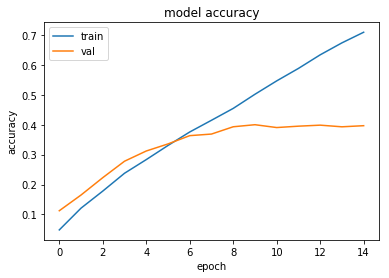

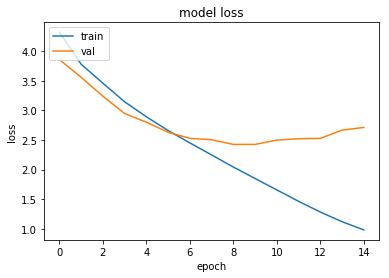

In [8]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Como se predijo con anterioridad el comportamiento de la red no fue tan bueno como cuando se trabajó con Cifar10, pero aun así el hecho de que la red haya alcanzado aproximadamente el 0,40 de accuracy en validación no es menor, entendiendoce que en este caso la esperanza aleatorea de clasificación es de 0,01.

En ambas curvas, tanto de Loss como de Accuraccy, puede notarse como al rededor del sexto epoch el modelo comienza a sobre ajustarse, empezando a estancarse o a empeorar su desempeño en el conjunto de validación, pero mejorando en gran medida su comportamiento en el conjunto de entrenamiento

> b) Debido al comportamiento de las curvas de entrenamiento, claramente se ve que se necesita un regularizador. Experimente utilizando Dropout con una tasa de 0.25 en las tandas convolucionales, elija donde situarlo, luego de la primera convolución, después de la segunda, solamente después del *pooling*, en todas o alguna forma que le parezca conveniente, de argumentos de ello. La idea es que se forme una idea de dónde conviene colocar el regularizador y porqué.

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:],activation='relu'))
model2.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
#DESPUES DEL PRIMER POOLING
model2.add(Dropout(0.25))
model2.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model2.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(1024,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(100))
model2.add(Activation('softmax'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [10]:
batch_size = 128
epochs = 15
opt = SGD(lr=0.01,momentum=0.9)
model2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1, validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 10s 191us/step - loss: 4.3148 - acc: 0.0470 - val_loss: 3.9380 - val_acc: 0.1004
Epoch 2/15
50000/50000 [==============================] - 9s 178us/step - loss: 3.8384 - acc: 0.1133 - val_loss: 3.5684 - val_acc: 0.1685
Epoch 3/15
50000/50000 [==============================] - 9s 178us/step - loss: 3.5153 - acc: 0.1684 - val_loss: 3.2364 - val_acc: 0.2295
Epoch 4/15
50000/50000 [==============================] - 9s 178us/step - loss: 3.2253 - acc: 0.2193 - val_loss: 3.0029 - val_acc: 0.2707
Epoch 5/15
50000/50000 [==============================] - 9s 178us/step - loss: 2.9726 - acc: 0.2674 - val_loss: 2.7919 - val_acc: 0.3101
Epoch 6/15
50000/50000 [==============================] - 9s 178us/step - loss: 2.7576 - acc: 0.3094 - val_loss: 2.6816 - val_acc: 0.3307
Epoch 7/15
50000/50000 [==============================] - 9s 178us/step - loss: 2.5642 - acc: 0.3468 - val_loss: 2.5053 -

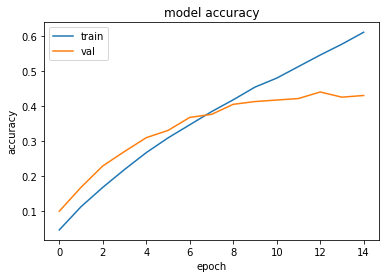

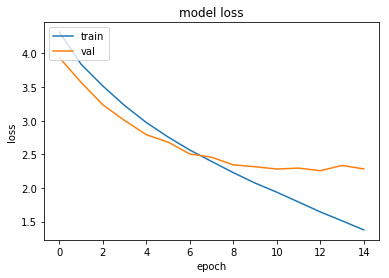

In [11]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Ya que la complejidad del ejercicio es bastante, cualquier mejora percibida por minúscula que sea es bien recibida.
En este caso como es de esperar aplicar un Dropout entre cualquier capa debería ayudar al modelo para no generar un <i>overfitting</i>.

Utilizando un Dropout despúes de la primera capa de pooling, se logro aumentar en 0,04 el accuracy anteriormente obtenido (0,39 ->0,43)

In [12]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:],activation='relu'))
model3.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model3.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
#DESPUES DEL SEGUNDO POOLING
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(1024,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(100))
model3.add(Activation('softmax'))
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 8, 64)          0         
__________

In [13]:
batch_size = 128
epochs = 15
opt = SGD(lr=0.01,momentum=0.9)
model3.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1, validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 10s 194us/step - loss: 4.4122 - acc: 0.0345 - val_loss: 4.0547 - val_acc: 0.0815
Epoch 2/15
50000/50000 [==============================] - 9s 177us/step - loss: 3.8870 - acc: 0.1057 - val_loss: 3.6061 - val_acc: 0.1606
Epoch 3/15
50000/50000 [==============================] - 9s 179us/step - loss: 3.5404 - acc: 0.1651 - val_loss: 3.2647 - val_acc: 0.2148
Epoch 4/15
50000/50000 [==============================] - 9s 177us/step - loss: 3.2396 - acc: 0.2190 - val_loss: 2.9368 - val_acc: 0.2880
Epoch 5/15
50000/50000 [==============================] - 9s 178us/step - loss: 2.9850 - acc: 0.2665 - val_loss: 2.7551 - val_acc: 0.3161
Epoch 6/15
50000/50000 [==============================] - 9s 177us/step - loss: 2.7960 - acc: 0.3046 - val_loss: 2.6651 - val_acc: 0.3342
Epoch 7/15
50000/50000 [==============================] - 9s 177us/step - loss: 2.6191 - acc: 0.3378 - val_loss: 2.5582 -

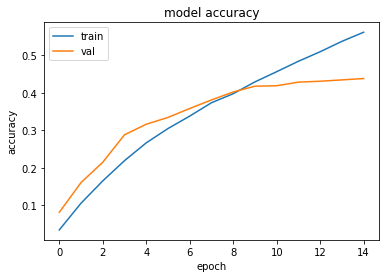

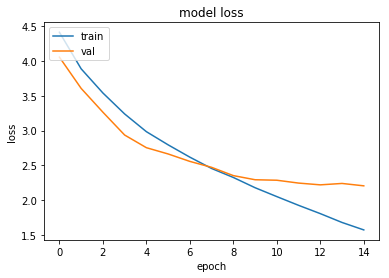

In [14]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

La diferencia entre aplicar el dropout después la segunda capa de pooling en comparación con aplicarlo después de la primera, no es realmente substancial, siendo una diferencia en centesimas de accuracy.

In [15]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:],activation='relu'))
model4.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
#DESPUES DEL PRIMER POOLING
model4.add(Dropout(0.25))
model4.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model4.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
#DESPUES DEL SEGUNDO POOLING
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(1024,activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(100))
model4.add(Activation('softmax'))
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)          0         
__________

In [16]:
batch_size = 128
epochs = 15
opt = SGD(lr=0.01,momentum=0.9)
model4.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history4 = model4.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1, validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 10s 200us/step - loss: 4.4309 - acc: 0.0323 - val_loss: 4.0062 - val_acc: 0.0829
Epoch 2/15
50000/50000 [==============================] - 9s 184us/step - loss: 3.9297 - acc: 0.0963 - val_loss: 3.6814 - val_acc: 0.1480
Epoch 3/15
50000/50000 [==============================] - 9s 185us/step - loss: 3.6389 - acc: 0.1457 - val_loss: 3.4070 - val_acc: 0.1909
Epoch 4/15
50000/50000 [==============================] - 9s 183us/step - loss: 3.3792 - acc: 0.1913 - val_loss: 3.1033 - val_acc: 0.2541
Epoch 5/15
50000/50000 [==============================] - 9s 184us/step - loss: 3.1469 - acc: 0.2342 - val_loss: 2.9368 - val_acc: 0.2850
Epoch 6/15
50000/50000 [==============================] - 9s 182us/step - loss: 2.9541 - acc: 0.2703 - val_loss: 2.7703 - val_acc: 0.3171
Epoch 7/15
50000/50000 [==============================] - 9s 184us/step - loss: 2.7747 - acc: 0.3057 - val_loss: 2.5937 -

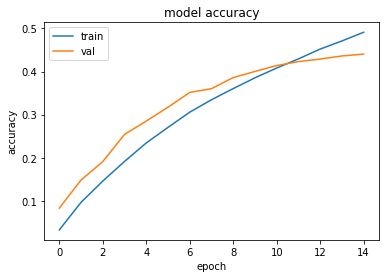

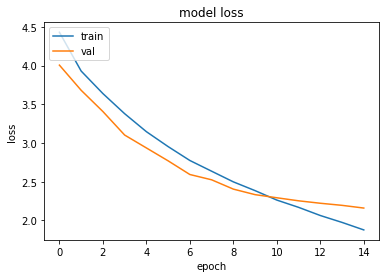

In [17]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Combinando ambos experimentos anteriores, colocando un Dropout después de cada capa de pooling se logró mejorar un poco más el comportamiento del modelo en el conjunto de validación, llegando porfin a 0,44 de accuracy.

In [33]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:],activation='relu'))
model4.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model4.add(Dropout(0.25))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model4.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Flatten())
model4.add(Dense(1024,activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(100))
model4.add(Activation('softmax'))
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
dropout_15 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 64)          0         
__________

In [34]:
batch_size = 128
epochs = 15
opt = SGD(lr=0.01,momentum=0.9)
model4.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history4 = model4.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1, validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 11s 222us/step - loss: 4.2972 - acc: 0.0516 - val_loss: 3.9294 - val_acc: 0.1196
Epoch 2/15
50000/50000 [==============================] - 10s 199us/step - loss: 3.7364 - acc: 0.1328 - val_loss: 3.4903 - val_acc: 0.1920
Epoch 3/15
50000/50000 [==============================] - 10s 199us/step - loss: 3.3343 - acc: 0.2015 - val_loss: 3.1885 - val_acc: 0.2498
Epoch 4/15
50000/50000 [==============================] - 10s 200us/step - loss: 3.0209 - acc: 0.2594 - val_loss: 2.8867 - val_acc: 0.3034
Epoch 5/15
50000/50000 [==============================] - 10s 199us/step - loss: 2.7579 - acc: 0.3111 - val_loss: 2.7217 - val_acc: 0.3390
Epoch 6/15
50000/50000 [==============================] - 10s 200us/step - loss: 2.5270 - acc: 0.3577 - val_loss: 2.5729 - val_acc: 0.3602
Epoch 7/15
50000/50000 [==============================] - 10s 200us/step - loss: 2.3107 - acc: 0.4014 - val_loss: 2.

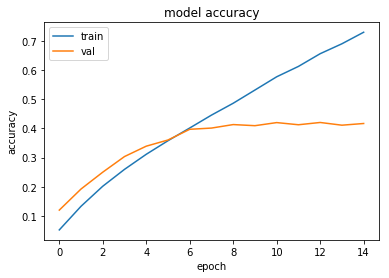

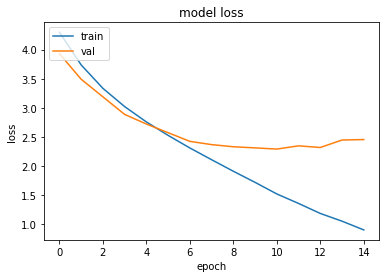

In [35]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [36]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:],activation='relu'))
model4.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model4.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model4.add(Dropout(0.25))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Flatten())
model4.add(Dense(1024,activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(100))
model4.add(Activation('softmax'))
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
dropout_17 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 64)          0         
__________

In [37]:
batch_size = 128
epochs = 15
opt = SGD(lr=0.01,momentum=0.9)
model4.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history4 = model4.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1, validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 11s 214us/step - loss: 4.3174 - acc: 0.0476 - val_loss: 3.9330 - val_acc: 0.1176
Epoch 2/15
50000/50000 [==============================] - 10s 191us/step - loss: 3.7865 - acc: 0.1244 - val_loss: 3.6219 - val_acc: 0.1712
Epoch 3/15
50000/50000 [==============================] - 10s 192us/step - loss: 3.4449 - acc: 0.1815 - val_loss: 3.3559 - val_acc: 0.2250
Epoch 4/15
50000/50000 [==============================] - 10s 192us/step - loss: 3.1430 - acc: 0.2364 - val_loss: 3.0506 - val_acc: 0.2787
Epoch 5/15
50000/50000 [==============================] - 10s 193us/step - loss: 2.8963 - acc: 0.2831 - val_loss: 2.7953 - val_acc: 0.3242
Epoch 6/15
50000/50000 [==============================] - 10s 193us/step - loss: 2.6696 - acc: 0.3285 - val_loss: 2.7046 - val_acc: 0.3365
Epoch 7/15
50000/50000 [==============================] - 10s 191us/step - loss: 2.4865 - acc: 0.3656 - val_loss: 2.

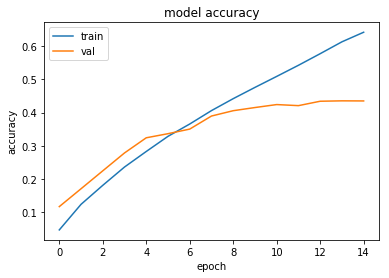

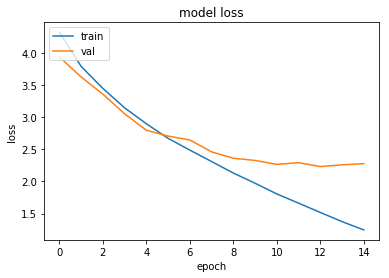

In [38]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Los siguientes experimentos fueron colocar Dropouts antes de las capas de pooling, pero a diferencia de las pruebas anteriores no rindieron buenos frutos, por lo que se concluye empíricamente que para este ejercicio colocar Dropouts despúes de las capas de pooling rinde mejores resultados.

> c) Como pre entrenamiento de la misma red definida en a) de una manera no supervisada se trabajará con un autoencoder convolucional, el cual no necesita etiqueta de los datos por lo que se puede aprovechar de transferir lo aprendido con datos sin conocer si pertenecen a la misma categoría o no. Comente y analice si esto mejora lo visto en a). *Utilice todas las imágenes no etiquetadas que desee*.

```python
from keras.layers import Input
from keras.models import Model
###BUILD AUTOENCODER1
input_img = Input(shape=x_train.shape[1:])
encoded1 = Conv2D(hidden_layer1, (3, 3),activation=activation_1,padding='same')(input_img)
decoded1 = Conv2D(3, (3, 3), activation=decoder_activation, padding='same')(encoded1)
autoencoder1 = Model(input_img, decoded1)
autoencoder1.compile(optimizer='adam', loss=loss_)
autoencoder1.summary()
autoencoder1.fit(x_train, x_train, epochs=15, batch_size=128,validation_data=(x_test, x_test))
autoencoder1.save('autoencoder_layer1.h5')
###BUILD AUTOENCODER2
encoded1 = autoencoder1.layers[1](autoencoder1.input)
#AUTOENCODER2
encoded2 = Conv2D(hidden_layer2,(3, 3), activation=activation_2, padding='same')(encoded1) 
decoded2 = Conv2D(hidden_layer1,(3, 3), activation=decoder_activation2,padding='same')(encoded2) 
#finish AUTOENCODER2
decoded1 = autoencoder1.layers[-1](decoded2)
autoencoder2 = Model(autoencoder1.input, decoded1) #all model
#autoencoder1 set fixed
autoencoder2.layers[1].trainable=False
autoencoder2.layers[-1].trainable=False
autoencoder2.compile(optimizer='adam', loss=loss_)
autoencoder2.summary()
autoencoder2.fit(x_train, x_train, epochs=10, batch_size=128,validation_data=(x_test, x_test))
autoencoder2.save('autoencoder_layer2.h5')
#FINE TUNNING
model = Sequential()
model.add(Conv2D(hidden_layer1,(3, 3),padding='same',activation=activation_1,input_shape=x_train.shape[1:]))
model.layers[-1].set_weights(autoencoder1.layers[1].get_weights())
model.add(Conv2D(hidden_layer2, (3, 3),padding='same',activation=activation_2))
model.layers[-1].set_weights(autoencoder2.layers[2].get_weights())
model.add(MaxPooling2D(pool_size=(2, 2)))
...#rest of the model
optimizer_ = keras.optimizers.SGD(lr=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128,epochs=15,verbose=1, alidation_data=(x_test, y_test))
```

In [48]:
from keras.layers import Input
from keras.models import Model
###BUILD AUTOENCODER1

hidden_layer1 = 16
hidden_layer2 = 16
activation_1 = 'relu'
activation_2 = 'relu'
decoder_activation ='relu'
decoder_activation2 ='relu'
loss_ = 'categorical_crossentropy'

input_img = Input(shape=x_train.shape[1:])
encoded1 = Conv2D(hidden_layer1, (3, 3),activation=activation_1,padding='same')(input_img)
decoded1 = Conv2D(3, (3, 3), activation=decoder_activation, padding='same')(encoded1)
autoencoder1 = Model(input_img, decoded1)
autoencoder1.compile(optimizer='adam', loss=loss_)
autoencoder1.summary()
autoencoder1.fit(x_train, x_train, epochs=15, batch_size=128,validation_data=(x_test, x_test))
autoencoder1.save('autoencoder_layer1.h5')
###BUILD AUTOENCODER2
encoded1 = autoencoder1.layers[1](autoencoder1.input)
#AUTOENCODER2
encoded2 = Conv2D(hidden_layer2,(3, 3), activation=activation_2, padding='same')(encoded1) 
decoded2 = Conv2D(hidden_layer1,(3, 3), activation=decoder_activation2,padding='same')(encoded2) 
#finish AUTOENCODER2
decoded1 = autoencoder1.layers[-1](decoded2)
autoencoder2 = Model(autoencoder1.input, decoded1) #all model
#autoencoder1 set fixed
autoencoder2.layers[1].trainable=False
autoencoder2.layers[-1].trainable=False
autoencoder2.compile(optimizer='adam', loss=loss_)
autoencoder2.summary()
autoencoder2.fit(x_train, x_train, epochs=10, batch_size=128,validation_data=(x_test, x_test))
autoencoder2.save('autoencoder_layer2.h5')
#FINE TUNNING
model = Sequential()
model.add(Conv2D(hidden_layer1,(3, 3),padding='same',activation=activation_1,input_shape=x_train.shape[1:]))
model.layers[-1].set_weights(autoencoder1.layers[1].get_weights())
model.add(Conv2D(hidden_layer2, (3, 3),padding='same',activation=activation_2))
model.layers[-1].set_weights(autoencoder2.layers[2].get_weights())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100))
model.add(Activation('softmax'))
optimizer_ = keras.optimizers.SGD(lr=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128,epochs=15,verbose=1, alidation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 32, 32, 3)         435       
Total params: 883
Trainable params: 883
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 8s 166us/step - loss: nan - val_loss: 1.5490
Epoch 2/15
50000/50000 [==============================] - 7s 147us/step - loss: 1.5443 - val_loss: 1.5462
Epoch 3/15
50000/50000 [==============================] - 7s 149us/step - loss: 1.5424 - val_loss: 1.5453
Epoch 4/15
50000/50000 [===================

TypeError: Unrecognized keyword arguments: {'alidation_data': (array([[[[0.78039216, 0.84313725, 0.97647059],
         [0.76862745, 0.82745098, 0.95686275],
         [0.76470588, 0.82352941, 0.95294118],
         ...,
         [0.84705882, 0.90588235, 0.98039216],
         [0.85098039, 0.90588235, 0.98039216],
         [0.87843137, 0.91764706, 0.98823529]],

        [[0.77254902, 0.82352941, 0.9372549 ],
         [0.76470588, 0.81568627, 0.93333333],
         [0.76470588, 0.82352941, 0.94117647],
         ...,
         [0.90588235, 0.95294118, 0.98039216],
         [0.91372549, 0.95294118, 0.98039216],
         [0.94509804, 0.96078431, 0.99215686]],

        [[0.87058824, 0.88627451, 0.96470588],
         [0.83529412, 0.8627451 , 0.94901961],
         [0.81960784, 0.85882353, 0.95294118],
         ...,
         [0.95294118, 0.98039216, 0.98431373],
         [0.95686275, 0.97647059, 0.98431373],
         [0.98039216, 0.98039216, 0.99215686]],

        ...,

        [[0.28235294, 0.28627451, 0.38823529],
         [0.27843137, 0.29019608, 0.4       ],
         [0.29019608, 0.30588235, 0.42352941],
         ...,
         [0.8627451 , 0.81568627, 0.85098039],
         [0.71764706, 0.65882353, 0.70980392],
         [0.60784314, 0.55294118, 0.58823529]],

        [[0.28235294, 0.29411765, 0.40784314],
         [0.29803922, 0.31764706, 0.43529412],
         [0.32941176, 0.34901961, 0.47843137],
         ...,
         [0.87058824, 0.83137255, 0.8627451 ],
         [0.73333333, 0.68235294, 0.75294118],
         [0.56862745, 0.51764706, 0.58431373]],

        [[0.31372549, 0.33333333, 0.4627451 ],
         [0.32941176, 0.35294118, 0.48235294],
         [0.33333333, 0.36078431, 0.49803922],
         ...,
         [0.85098039, 0.81176471, 0.84313725],
         [0.81176471, 0.76078431, 0.82745098],
         [0.69019608, 0.64313725, 0.71764706]]],


       [[[0.44313725, 0.50980392, 0.38431373],
         [0.34509804, 0.41176471, 0.28627451],
         [0.28235294, 0.34901961, 0.22745098],
         ...,
         [0.41176471, 0.48627451, 0.36470588],
         [0.3372549 , 0.41568627, 0.29019608],
         [0.24705882, 0.32156863, 0.21568627]],

        [[0.37254902, 0.44313725, 0.31372549],
         [0.30588235, 0.38039216, 0.25098039],
         [0.24313725, 0.31372549, 0.19215686],
         ...,
         [0.40392157, 0.47843137, 0.32941176],
         [0.34901961, 0.42745098, 0.2745098 ],
         [0.25490196, 0.3254902 , 0.19215686]],

        [[0.30980392, 0.38039216, 0.24313725],
         [0.25490196, 0.32156863, 0.19215686],
         [0.20392157, 0.2627451 , 0.14509804],
         ...,
         [0.25490196, 0.30980392, 0.20392157],
         [0.24313725, 0.30980392, 0.2       ],
         [0.19215686, 0.25098039, 0.14901961]],

        ...,

        [[0.4745098 , 0.4       , 0.3372549 ],
         [0.49803922, 0.42352941, 0.37647059],
         [0.54509804, 0.4745098 , 0.43529412],
         ...,
         [0.31372549, 0.39215686, 0.27843137],
         [0.29411765, 0.37254902, 0.26666667],
         [0.25882353, 0.33333333, 0.24313725]],

        [[0.66666667, 0.56862745, 0.51372549],
         [0.65490196, 0.56862745, 0.51764706],
         [0.62352941, 0.54901961, 0.50196078],
         ...,
         [0.39215686, 0.44313725, 0.32941176],
         [0.34901961, 0.40392157, 0.30196078],
         [0.28627451, 0.34117647, 0.25098039]],

        [[0.65882353, 0.58823529, 0.52941176],
         [0.66666667, 0.59607843, 0.5372549 ],
         [0.67843137, 0.61176471, 0.55294118],
         ...,
         [0.4627451 , 0.48235294, 0.37647059],
         [0.38823529, 0.41568627, 0.31372549],
         [0.32941176, 0.36078431, 0.2627451 ]]],


       [[[0.23921569, 0.35294118, 0.47058824],
         [0.23921569, 0.34901961, 0.46666667],
         [0.2627451 , 0.37647059, 0.49019608],
         ...,
         [0.2745098 , 0.36470588, 0.48627451],
         [0.25098039, 0.34117647, 0.4627451 ],
         [0.25098039, 0.34509804, 0.46666667]],

        [[0.2627451 , 0.38039216, 0.49803922],
         [0.30588235, 0.42352941, 0.54117647],
         [0.31372549, 0.42745098, 0.54509804],
         ...,
         [0.37254902, 0.44313725, 0.55686275],
         [0.3254902 , 0.39607843, 0.50588235],
         [0.3254902 , 0.4       , 0.50980392]],

        [[0.25098039, 0.36470588, 0.48235294],
         [0.25882353, 0.37254902, 0.49019608],
         [0.23921569, 0.35294118, 0.47058824],
         ...,
         [0.47058824, 0.5254902 , 0.62745098],
         [0.42745098, 0.48235294, 0.58823529],
         [0.43921569, 0.49411765, 0.59607843]],

        ...,

        [[0.32941176, 0.34117647, 0.34117647],
         [0.2627451 , 0.23137255, 0.14901961],
         [0.32941176, 0.30588235, 0.12941176],
         ...,
         [0.8       , 0.65490196, 0.62745098],
         [0.92156863, 0.79215686, 0.75294118],
         [0.9254902 , 0.80784314, 0.75686275]],

        [[0.28235294, 0.25098039, 0.21176471],
         [0.2745098 , 0.21176471, 0.11764706],
         [0.32941176, 0.30980392, 0.15686275],
         ...,
         [0.78039216, 0.61568627, 0.59607843],
         [0.74509804, 0.58823529, 0.55686275],
         [0.76862745, 0.63137255, 0.58431373]],

        [[0.28235294, 0.23921569, 0.18431373],
         [0.29803922, 0.25098039, 0.1372549 ],
         [0.30196078, 0.29019608, 0.14509804],
         ...,
         [0.89019608, 0.74901961, 0.74117647],
         [0.60784314, 0.46666667, 0.45098039],
         [0.5254902 , 0.38431373, 0.34901961]]],


       ...,


       [[[0.09411765, 0.14901961, 0.12156863],
         [0.09411765, 0.15686275, 0.12156863],
         [0.08627451, 0.13333333, 0.10980392],
         ...,
         [0.21960784, 0.23137255, 0.21568627],
         [0.1372549 , 0.15686275, 0.14509804],
         [0.09803922, 0.1372549 , 0.1254902 ]],

        [[0.0745098 , 0.11372549, 0.10196078],
         [0.10980392, 0.17647059, 0.1372549 ],
         [0.09803922, 0.15686275, 0.11372549],
         ...,
         [0.21568627, 0.22352941, 0.22745098],
         [0.14901961, 0.16470588, 0.17254902],
         [0.14117647, 0.17254902, 0.15294118]],

        [[0.09019608, 0.14901961, 0.10980392],
         [0.12156863, 0.2       , 0.1372549 ],
         [0.11372549, 0.19607843, 0.1254902 ],
         ...,
         [0.12941176, 0.16078431, 0.14117647],
         [0.12941176, 0.14509804, 0.16078431],
         [0.16470588, 0.19215686, 0.17254902]],

        ...,

        [[0.15294118, 0.28627451, 0.11372549],
         [0.18431373, 0.37254902, 0.09803922],
         [0.23921569, 0.40784314, 0.17254902],
         ...,
         [0.16078431, 0.30980392, 0.1372549 ],
         [0.27843137, 0.40392157, 0.28235294],
         [0.21176471, 0.36470588, 0.20784314]],

        [[0.15294118, 0.28235294, 0.13333333],
         [0.15686275, 0.35686275, 0.07058824],
         [0.2       , 0.37647059, 0.12941176],
         ...,
         [0.12941176, 0.2745098 , 0.09411765],
         [0.2627451 , 0.39215686, 0.24313725],
         [0.23921569, 0.39607843, 0.21568627]],

        [[0.18823529, 0.34901961, 0.12941176],
         [0.14509804, 0.3254902 , 0.06666667],
         [0.18039216, 0.35686275, 0.09411765],
         ...,
         [0.12941176, 0.25882353, 0.07843137],
         [0.25490196, 0.37254902, 0.21176471],
         [0.23529412, 0.36862745, 0.21176471]]],


       [[[0.3372549 , 0.35294118, 0.31372549],
         [0.36470588, 0.35294118, 0.29411765],
         [0.10980392, 0.09803922, 0.08235294],
         ...,
         [0.28627451, 0.20392157, 0.14117647],
         [0.2627451 , 0.19215686, 0.15294118],
         [0.36078431, 0.27843137, 0.23921569]],

        [[0.32156863, 0.3372549 , 0.31372549],
         [0.16862745, 0.17254902, 0.16078431],
         [0.06666667, 0.06666667, 0.07058824],
         ...,
         [0.25490196, 0.16470588, 0.10980392],
         [0.13333333, 0.09019608, 0.0627451 ],
         [0.21960784, 0.16078431, 0.12941176]],

        [[0.25098039, 0.25882353, 0.23529412],
         [0.09803922, 0.10588235, 0.10196078],
         [0.15294118, 0.15294118, 0.15294118],
         ...,
         [0.21176471, 0.14509804, 0.09411765],
         [0.13333333, 0.09803922, 0.0745098 ],
         [0.15686275, 0.12156863, 0.08627451]],

        ...,

        [[0.16862745, 0.16862745, 0.15294118],
         [0.34117647, 0.32156863, 0.2745098 ],
         [0.43921569, 0.41176471, 0.35686275],
         ...,
         [0.50980392, 0.50980392, 0.48235294],
         [0.50196078, 0.49411765, 0.4745098 ],
         [0.46666667, 0.4745098 , 0.46666667]],

        [[0.17254902, 0.16470588, 0.1372549 ],
         [0.30980392, 0.29019608, 0.24313725],
         [0.38823529, 0.37254902, 0.32156863],
         ...,
         [0.52941176, 0.52156863, 0.48235294],
         [0.50980392, 0.49803922, 0.46666667],
         [0.4745098 , 0.47058824, 0.44705882]],

        [[0.33333333, 0.32156863, 0.2745098 ],
         [0.38039216, 0.35686275, 0.30196078],
         [0.35294118, 0.34509804, 0.29803922],
         ...,
         [0.51764706, 0.50196078, 0.46666667],
         [0.50588235, 0.48627451, 0.45098039],
         [0.47058824, 0.45882353, 0.42745098]]],


       [[[0.96470588, 0.96470588, 0.94901961],
         [0.94117647, 0.93333333, 0.90980392],
         [0.83921569, 0.83137255, 0.78039216],
         ...,
         [0.29019608, 0.1254902 , 0.1372549 ],
         [0.30196078, 0.13333333, 0.14509804],
         [0.31764706, 0.13333333, 0.1372549 ]],

        [[0.82352941, 0.80392157, 0.76862745],
         [0.95294118, 0.94117647, 0.90196078],
         [0.89803922, 0.88235294, 0.83921569],
         ...,
         [0.29411765, 0.12941176, 0.1372549 ],
         [0.30980392, 0.1372549 , 0.14901961],
         [0.3254902 , 0.13333333, 0.14117647]],

        [[0.56470588, 0.5254902 , 0.43921569],
         [0.68627451, 0.63921569, 0.56470588],
         [0.61960784, 0.56470588, 0.50980392],
         ...,
         [0.29019608, 0.12941176, 0.1372549 ],
         [0.30980392, 0.1372549 , 0.14901961],
         [0.32156863, 0.12941176, 0.14117647]],

        ...,

        [[0.77647059, 0.74509804, 0.69019608],
         [0.43529412, 0.43529412, 0.25882353],
         [0.22745098, 0.21568627, 0.10588235],
         ...,
         [0.24313725, 0.31764706, 0.16078431],
         [0.28235294, 0.39215686, 0.16078431],
         [0.31372549, 0.41960784, 0.19215686]],

        [[0.65490196, 0.62745098, 0.56470588],
         [0.24313725, 0.25098039, 0.10588235],
         [0.33333333, 0.33333333, 0.26666667],
         ...,
         [0.36078431, 0.49411765, 0.22745098],
         [0.56078431, 0.71764706, 0.40784314],
         [0.62745098, 0.78039216, 0.4627451 ]],

        [[0.45098039, 0.42352941, 0.36862745],
         [0.16470588, 0.14509804, 0.08235294],
         [0.54509804, 0.53333333, 0.49803922],
         ...,
         [0.54509804, 0.6745098 , 0.44705882],
         [0.65490196, 0.8       , 0.55294118],
         [0.57254902, 0.71372549, 0.4627451 ]]]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))}

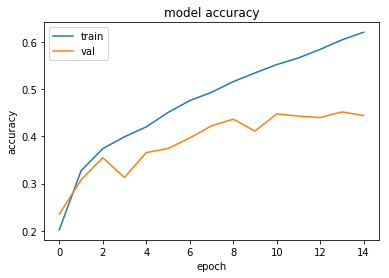

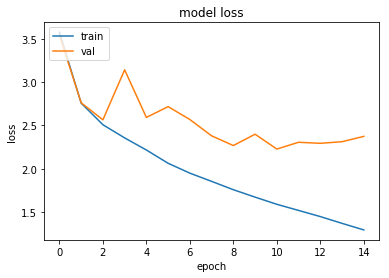

In [49]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Comentar diferencias con A



> d) Otra forma de hacer lo que se conoce como *transfer learning* es utilizar el conocimiento (los parámetros) aprendido por una red entrenada con millones de imágenes, y tomar estos parámetros como los pre entrenados. Para esto se utilizará el modelo VGG16 [7] proporcionado a través de la interfaz de keras. Visualice el modelo y sus 23 capas. Para esta instancia se utilizará todo lo aprendido por las capas convolucionales, es decir, se eliminan las capas densas del modelo y se agregan unas nuevas a ser entrenadas desde cero.

```python
from keras.applications import VGG16
#LOAD PRETRAINED MODEL 
input_tensor=Input(shape=x_train.shape[1:])
modelVGG = VGG16(weights='imagenet', include_top=False,input_tensor=input_tensor )
features_train = modelVGG.predict(x_train)
features_test = modelVGG.predict(x_test)
modelVGG.summary()
```

In [19]:
from keras.applications import VGG16
#LOAD PRETRAINED MODEL 
input_tensor=Input(shape=x_train.shape[1:])
modelVGG = VGG16(weights='imagenet', include_top=False,input_tensor=input_tensor )
features_train = modelVGG.predict(x_train)
features_test = modelVGG.predict(x_test)
modelVGG.summary()

58892288/58889256 [==============================] - 21s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_poo

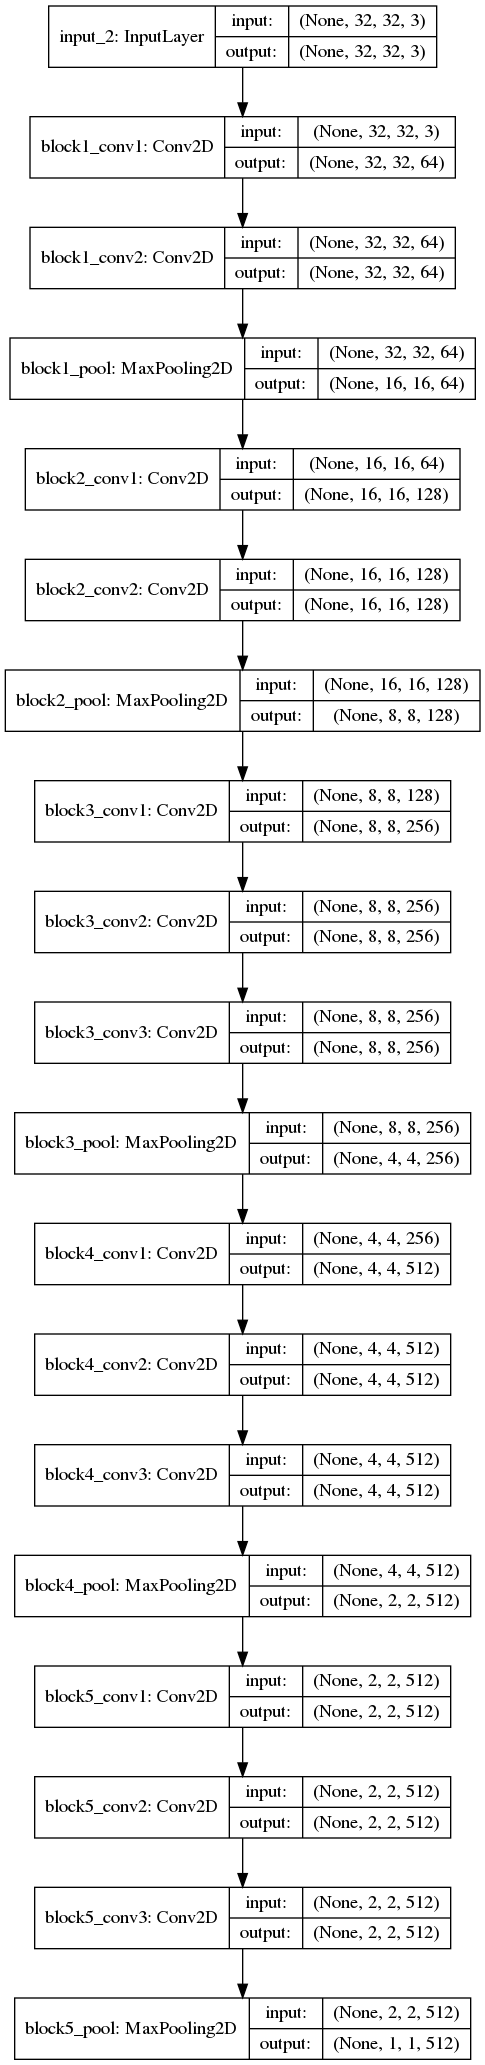

In [20]:
import os    
import keras
import matplotlib.pyplot as plt
from IPython.display import Image, display, SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, rmsprop
from keras.callbacks import LearningRateScheduler

from scipy.misc import imread
import _pickle as pickle
import numpy as np
import math

plot_model(modelVGG, to_file='model-4D.png', show_shapes=True)
Image(filename='model-4D.png')

A través del diagrama anterior puede notarse lo profundo que llega a ser el modelo VGG en comparación a los que se estuvieron utilizando hasta el momento.



> e) Entrene esta red agregando una capa densa de 1024 neuronas seguido de un dropout de 0.5, finalmente es necesario agregar la capa de clasificación para las 100 clases. Utilice la misma configuración del optimizador para que las comparaciones sean válidas. Entrene unicamente por 10 *epochs* ¿Qué sucede? Comente.

```python
model = Sequential()
model.add(Flatten(input_shape=features_train.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
...#clasification
model.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(features_train, y_train,epochs=epochs_, batch_size=128,verbose=1,validation_data=(features_test,y_test))
```

In [22]:
model5 = Sequential()
model5.add(Flatten(input_shape=features_train.shape[1:]))
model5.add(Dense(1024, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(100))
model5.add(Activation('softmax'))
model5.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
history5 = model5.fit(features_train, y_train,epochs=10, batch_size=128,verbose=1,validation_data=(features_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 48us/step - loss: 3.9671 - acc: 0.1097 - val_loss: 3.4071 - val_acc: 0.2031
Epoch 2/10
50000/50000 [==============================] - 2s 37us/step - loss: 3.3611 - acc: 0.1952 - val_loss: 3.1165 - val_acc: 0.2534
Epoch 3/10
50000/50000 [==============================] - 2s 37us/step - loss: 3.1652 - acc: 0.2309 - val_loss: 2.9975 - val_acc: 0.2684
Epoch 4/10
50000/50000 [==============================] - 2s 36us/step - loss: 3.0508 - acc: 0.2500 - val_loss: 2.9103 - val_acc: 0.2837
Epoch 5/10
50000/50000 [==============================] - 2s 36us/step - loss: 2.9682 - acc: 0.2667 - val_loss: 2.8499 - val_acc: 0.2941
Epoch 6/10
50000/50000 [==============================] - 2s 37us/step - loss: 2.9112 - acc: 0.2780 - val_loss: 2.8067 - val_acc: 0.3052
Epoch 7/10
50000/50000 [==============================] - 2s 36us/step - loss: 2.8658 - acc: 0.2872 - val_loss: 2.7690 - val_acc

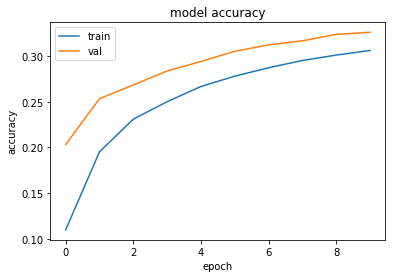

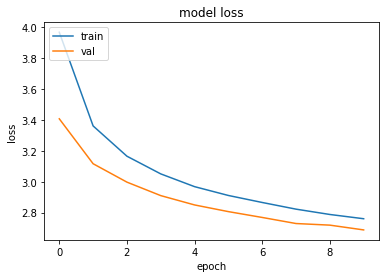

In [23]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history5.history['acc'])
plt.plot(history5.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Comentar sobre el rendimiento 


> f) Agregue una capa de normalización (*Batch Normalization* [8]) de las activaciones en las capas densas, esto es, restar por la media del batch y dividir por la desviación estándar. Vuelva a entrenar el modelo con la misma configuración pero ahora por **15 *epochs***. Comente lo observado y compare las curvas de convergencia con los modelos anteriores ¿Por qué esto mejora a lo presentado en e)? Realice los mismos gráficos que en a) a través del número de *epochs* y comente sobre el tiempo de ejecución de este entrenamiento.

```python
model = Sequential()
model.add(Flatten(input_shape=features_train.shape[1:]))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
...
```

In [29]:
from keras.layers import BatchNormalization 
model6 = Sequential()
model6.add(Flatten(input_shape=features_train.shape[1:]))
model6.add(BatchNormalization())
model6.add(Dense(1024, activation='relu'))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))
model6.add(Dense(100))
model6.add(Activation('softmax'))
model6.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
history6 = model6.fit(features_train, y_train,epochs=15, batch_size=128,verbose=1,validation_data=(features_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 4s 81us/step - loss: 3.7332 - acc: 0.2044 - val_loss: 2.8647 - val_acc: 0.3130
Epoch 2/15
50000/50000 [==============================] - 3s 57us/step - loss: 2.9568 - acc: 0.2928 - val_loss: 2.7068 - val_acc: 0.3387
Epoch 3/15
50000/50000 [==============================] - 3s 56us/step - loss: 2.7278 - acc: 0.3262 - val_loss: 2.6413 - val_acc: 0.3484
Epoch 4/15
50000/50000 [==============================] - 3s 57us/step - loss: 2.5849 - acc: 0.3480 - val_loss: 2.6038 - val_acc: 0.3571
Epoch 5/15
50000/50000 [==============================] - 3s 57us/step - loss: 2.4917 - acc: 0.3639 - val_loss: 2.5806 - val_acc: 0.3665
Epoch 6/15
50000/50000 [==============================] - 3s 56us/step - loss: 2.3995 - acc: 0.3818 - val_loss: 2.5681 - val_acc: 0.3636
Epoch 7/15
50000/50000 [==============================] - 3s 57us/step - loss: 2.3231 - acc: 0.3958 - val_loss: 2.5584 - val_acc

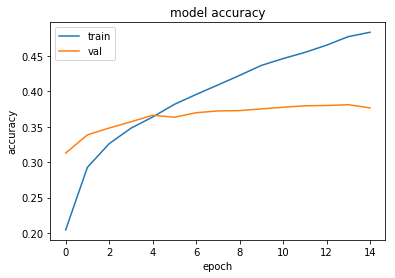

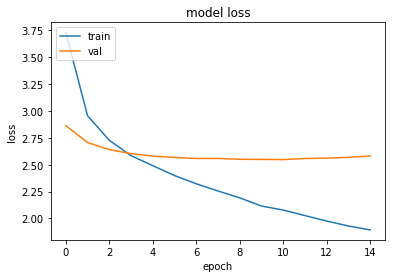

In [30]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history6.history['acc'])
plt.plot(history6.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Comentar la mejora de comportamiento


> g) Anteriormente se dejaron fijas las capas de convolución de VGG16, ahora experimente comentando sobre la convergencia y el tiempo de ejecución el entrenar la última tanda de convoluciones de VGG16, es decir, tome como punto inicial los pesos pre entrenados de esta red en *Imagenet* y entrenelos para este problema.

```python
#LOAD PRETRAINED MODEL 
input_tensor=Input(shape=x_train.shape[1:])
modelVGG = VGG16(weights='imagenet', include_top=False,input_tensor=input_tensor )
salida_vgg = modelVGG.get_layer('block4_pool').output_shape
model = Sequential()
model.add(Conv2D(512,(3, 3),input_shape=salida_vgg[1:],activation='relu',padding='same'))
model.add(Conv2D(512,(3, 3),activation='relu',padding='same'))
model.add(Conv2D(512,(3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2),strides=(2,2)))    
##dense section
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))
#delete last 4 layers of VGG16 and transfer the weight to new model
modelVGG.layers.pop() #delete last maxpooling
for i in np.arange(2,-1,-1):
    last = modelVGG.layers.pop() #delete convolutional layers
    model.layers[i].set_weights(last.get_weights())
from keras.models import Model
crop_modelVGG = Model(inputs=modelVGG.input, outputs=modelVGG.layers[-1].output)
features_train = crop_modelVGG.predict(x_train)
features_test = crop_modelVGG.predict(x_test)
#train it
model.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(features_train,y_train,epochs=15,batch_size=128,verbose=1,validation_data=(features_test,y_test))
```

In [31]:
#LOAD PRETRAINED MODEL 
input_tensor=Input(shape=x_train.shape[1:])
modelVGG = VGG16(weights='imagenet', include_top=False,input_tensor=input_tensor )
salida_vgg = modelVGG.get_layer('block4_pool').output_shape
model = Sequential()
model.add(Conv2D(512,(3, 3),input_shape=salida_vgg[1:],activation='relu',padding='same'))
model.add(Conv2D(512,(3, 3),activation='relu',padding='same'))
model.add(Conv2D(512,(3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2),strides=(2,2)))    
##dense section
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))
#delete last 4 layers of VGG16 and transfer the weight to new model
modelVGG.layers.pop() #delete last maxpooling
for i in np.arange(2,-1,-1):
    last = modelVGG.layers.pop() #delete convolutional layers
    model.layers[i].set_weights(last.get_weights())
    
from keras.models import Model
crop_modelVGG = Model(inputs=modelVGG.input, outputs=modelVGG.layers[-1].output)
features_train = crop_modelVGG.predict(x_train)
features_test = crop_modelVGG.predict(x_test)
#train it
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(features_train,y_train,epochs=15,batch_size=128,verbose=1,validation_data=(features_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 14s 270us/step - loss: 3.5750 - acc: 0.2016 - val_loss: 3.5429 - val_acc: 0.2348
Epoch 2/15
50000/50000 [==============================] - 12s 235us/step - loss: 2.7569 - acc: 0.3268 - val_loss: 2.7610 - val_acc: 0.3077
Epoch 3/15
50000/50000 [==============================] - 12s 236us/step - loss: 2.5078 - acc: 0.3740 - val_loss: 2.5640 - val_acc: 0.3546
Epoch 4/15
50000/50000 [==============================] - 12s 235us/step - loss: 2.3556 - acc: 0.3990 - val_loss: 3.1413 - val_acc: 0.3129
Epoch 5/15
50000/50000 [==============================] - 12s 237us/step - loss: 2.2159 - acc: 0.4201 - val_loss: 2.5920 - val_acc: 0.3655
Epoch 6/15
50000/50000 [==============================] - 12s 237us/step - loss: 2.0629 - acc: 0.4505 - val_loss: 2.7166 - val_acc: 0.3741
Epoch 7/15
50000/50000 [==============================] - 12s 239us/step - loss: 1.9488 - acc: 0.4757 - val_loss: 2.

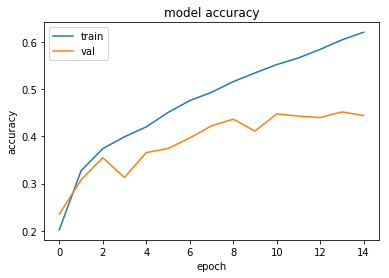

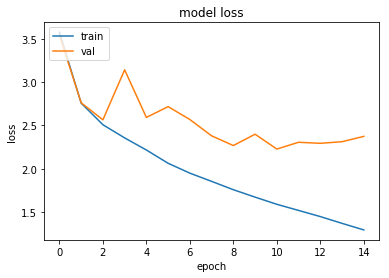

In [32]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Que sucede?